[[ 1.          0.90296096 -0.66934864 -0.74120796 -0.95549163 -1.04574623
   0.35441893  0.6352524   0.80363902]
 [-0.42119626  0.70312505 -1.0325478   0.54867662  0.21143823  0.45443995
   0.53488994 -0.46628824  0.68361007]
 [ 0.55938255 -0.31642789 -0.87711204  0.56178092 -0.80202946  0.25766005
  -0.50913929  0.00282421 -0.5017984 ]
 [ 0.34547737  0.84658825  0.62956362  0.83701592  0.03149773 -0.92516917
  -0.16606197  0.73942308 -1.0205543 ]
 [-0.81259047 -0.02725956 -0.60716124  0.18372513 -0.32268796 -0.31331089
   0.90785391  0.56980562 -1.10293705]]


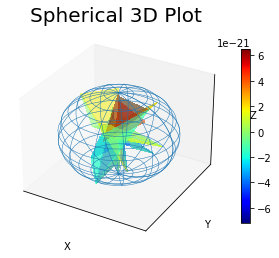

In [5]:
import pandas as pd
import numpy as np
import scipy as sci
import matplotlib.pyplot as plt
import mpl_toolkits.mplot3d.axes3d as Axes3D
from matplotlib import cm, colors
from array import *
import random

##En gros on fait une discrétisation du diagramme 3D de gain de l'antenne
#theta 
#La première entrée d'array() est un typecode, 'i' pour entier signé
vals_theta = array('i',[0,0,0,0,0,0,0,0,0,45,45,45,45,45,45,45,45,45,90,90,90, 
                        90,90,90,90,90,90,135,135,135,135,135,135,135,135,135,
                        180,180,180,180,180,180,180,180,180])
#phi
vals_phi = array('i',[0,45,90,135,180,225,270,315,360,
                      0,45,90,135,180,225,270,315,360,
                      0,45,90,135,180,225,270,315,360,
                      0,45,90,135,180,225,270,315,360,
                      0,45,90,135,180,225,270,315,360])

#random numbers simulating the power data
vals_power = np.random.uniform(low=-7.2E-21, high=7.2E-21, size=(45,))

theta1d = vals_theta
theta1d = np.array(theta1d);
theta2d = theta1d.reshape([5,9])

phi1d = vals_phi
phi1d = np.array(phi1d);
phi2d = phi1d.reshape([5,9])

power1d = vals_power
power1d = np.array(power1d);
power2d = power1d.reshape([5,9])

THETA = np.deg2rad(theta2d)
PHI = np.deg2rad(phi2d)
R = power2d
Rmax = np.max(R)

X = R * np.sin(THETA) * np.cos(PHI)
Y = R * np.sin(THETA) * np.sin(PHI)
Z = R * np.cos(THETA)

fig = plt.figure()

ax = fig.add_subplot(1,1,1, projection='3d')
ax.grid(True)
ax.axis('on')
ax.set_xticks([])
ax.set_yticks([])
ax.set_zticks([])

N = R / Rmax

print(N)
ax.plot_surface(

    X, Y, Z, rstride=1, cstride=1, cmap=plt.get_cmap('jet'),

    linewidth=0, antialiased=False, alpha=0.5, zorder = 0.5)

ax.set_title('Spherical 3D Plot', fontsize=20)
m = cm.ScalarMappable(cmap=cm.jet)
m.set_array(R)
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
m = cm.ScalarMappable(cmap=cm.jet)
m.set_array(R) 
fig.colorbar(m, shrink=0.8);
ax.view_init(azim=300, elev = 30)

# Add Spherical Grid
phi ,theta = np.linspace(0, 2 * np.pi, 40), np.linspace(0, np.pi, 40)
PHI, THETA  = np.meshgrid(phi,theta)
R = Rmax

X = R * np.sin(THETA) * np.cos(PHI)
Y = R * np.sin(THETA) * np.sin(PHI)
Z = R * np.cos(THETA)

ax.plot_wireframe(X, Y, Z, linewidth=0.5, rstride=3, cstride=3)


#print(theta1d)
#print(theta2d)
#print(power2d)
plt.show()